In [ ]:
## Last amended: 24th June, 2020
## My folder: C:\Users\ashokharnal\OneDrive\Documents\cluster_analysis
##            /home/ashok/Documents/4.clustering

## My R file: quantization_image.R
## Ref: Colour quantization:
## http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
## https://alstatr.blogspot.in/2014/09/r-k-means-clustering-on-image.html
## https://en.wikipedia.org/wiki/Color_quantization
## http://lmcaraig.com/color-quantization-using-k-means/
## https://rwalk.xyz/color-quantization-in-r/
##
## Objectives:
##           i)  Learn to process images: read/reshape/save
##           ii) Reduce no of colours in a colour palette
##               using k-means

## Steps:
#             1. Read any image (skimage.imread/plt.imread)
#                Shape: 419 X 640 X 3
#             2. Reshape it to: 268160 X 3 (np.reshape)
#                That is, each pixel falls in a row with its
#                three colour intensities listed
#             3. Scale above numpy table/color values by dividing by 255
#             4. We have three columns of 270000 rows each
#                Cluster them into 64 clusters (KMeans)
#             5. Find cluster labels of each row (clust_labels)
#             6. Replace each RGB row by its respective
#                cluster-center (model.cluster_centers_[clust_labels])
#             7. Reshape image back and plot it



In [1]:
## 1. Call libraries
import numpy as np
# 1.1. For displaying graphics
import matplotlib.pyplot as plt
# 1.2. For image reading/manipulation
#      Images can be manipulated using opencv, pillow and skimage
#      Install skimage as:
##     conda install -c anaconda scikit-image
from skimage.io import imread    # Read image
from skimage.io import imshow    # Display image
from skimage.io import imsave    # Save image
# 1.3 For clustering
from sklearn.cluster import KMeans
# 1.4 OS related
import os
import time  # Measuring process time

In [2]:
# IPython Notebook cell multiple outputs
# https://stackoverflow.com/a/42476224/3282777
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 1.5 Set print options for arrays
np.set_printoptions(precision = 3,          # Display upto 3 decimal places
                    threshold=np.inf        # Display full array
                    )

# 2. Set working folder and read file
os.chdir("F:\\vmfinal\\lubuntu_machinelearning_I\\lubuntu_machinelearning_I_raw\\Documents\\4.clustering")

In [4]:
# 2.1 Read the image file
china= plt.imread("china.jpg")
#china   # Image is  a multi-dimensional array

In [5]:
# 2.1.1 Three colour channels (RGB) of 419 X 640 each
china.shape    # 419 X 640 X 3==> Panels of 419 X 640, 3 layers deep
# china[0,0,0], china[0,0,1], china[0,0,2] => Colour of 1 pixrl
china[0,0,0] , china[0,0,1], china[0,0,2]    # (175, 200, 230)

china.dtype    # dtype('uint8')

(419, 640, 3)

(175, 200, 230)

dtype('uint8')

In [6]:
### 2.2 Some Experiment on image array
#       Observe some colour values in each frame
china[0,0,0] , china[0,0,1] , china[0,0,2]     # (175, 200, 230)

# 2.3 What are max and min colour intensites
np.min(china)       # 0
np.max(china)       # 255

(175, 200, 230)

0

255

In [7]:
##############################################
# Experiment begins on reshaping image
##############################################
# 2.4 Reshaping image and reshaping back. Is it restored?
#      Extract colour intensity values form
test = china[120:124, 116:121, 0:3]
test
# 2.4.1 Its shape?
test.shape    # (4,5,3)
test          #  Or 4-rows of 5-pixels each
              #   Inner array is RGB coord of each pixel


china[120,116,0]        # 29
china[120,116,1]        # 33
china[121,116,0]        # 10
china[121,116,1]        # 14
china[120,117,0]        # 11
china[120,117,1]        # 15


# 2.4.2 Now reshape it in a 2-d array
test1 = test.reshape(20,3)    # 20 rows X 3 cols

# 2.4.3 Compare the following two: one reshaped
#       and the other not
test1
test

# 2.4.4 And reshape back. Does it compare with original?
test1.reshape(4,5,3)

### Experiment Ends
##############################################

array([[[29, 33, 32],
        [11, 15, 14],
        [ 4,  8,  7],
        [15, 21, 21],
        [19, 25, 25]],

       [[10, 14, 15],
        [ 8, 14, 14],
        [12, 18, 18],
        [20, 26, 26],
        [17, 23, 23]],

       [[27, 28, 30],
        [23, 24, 26],
        [10, 14, 15],
        [26, 30, 33],
        [18, 22, 25]],

       [[13, 13, 15],
        [15, 15, 17],
        [13, 13, 15],
        [15, 15, 17],
        [30, 31, 33]]], dtype=uint8)

(4, 5, 3)

array([[[29, 33, 32],
        [11, 15, 14],
        [ 4,  8,  7],
        [15, 21, 21],
        [19, 25, 25]],

       [[10, 14, 15],
        [ 8, 14, 14],
        [12, 18, 18],
        [20, 26, 26],
        [17, 23, 23]],

       [[27, 28, 30],
        [23, 24, 26],
        [10, 14, 15],
        [26, 30, 33],
        [18, 22, 25]],

       [[13, 13, 15],
        [15, 15, 17],
        [13, 13, 15],
        [15, 15, 17],
        [30, 31, 33]]], dtype=uint8)

29

33

10

14

11

15

array([[29, 33, 32],
       [11, 15, 14],
       [ 4,  8,  7],
       [15, 21, 21],
       [19, 25, 25],
       [10, 14, 15],
       [ 8, 14, 14],
       [12, 18, 18],
       [20, 26, 26],
       [17, 23, 23],
       [27, 28, 30],
       [23, 24, 26],
       [10, 14, 15],
       [26, 30, 33],
       [18, 22, 25],
       [13, 13, 15],
       [15, 15, 17],
       [13, 13, 15],
       [15, 15, 17],
       [30, 31, 33]], dtype=uint8)

array([[[29, 33, 32],
        [11, 15, 14],
        [ 4,  8,  7],
        [15, 21, 21],
        [19, 25, 25]],

       [[10, 14, 15],
        [ 8, 14, 14],
        [12, 18, 18],
        [20, 26, 26],
        [17, 23, 23]],

       [[27, 28, 30],
        [23, 24, 26],
        [10, 14, 15],
        [26, 30, 33],
        [18, 22, 25]],

       [[13, 13, 15],
        [15, 15, 17],
        [13, 13, 15],
        [15, 15, 17],
        [30, 31, 33]]], dtype=uint8)

array([[[29, 33, 32],
        [11, 15, 14],
        [ 4,  8,  7],
        [15, 21, 21],
        [19, 25, 25]],

       [[10, 14, 15],
        [ 8, 14, 14],
        [12, 18, 18],
        [20, 26, 26],
        [17, 23, 23]],

       [[27, 28, 30],
        [23, 24, 26],
        [10, 14, 15],
        [26, 30, 33],
        [18, 22, 25]],

       [[13, 13, 15],
        [15, 15, 17],
        [13, 13, 15],
        [15, 15, 17],
        [30, 31, 33]]], dtype=uint8)

In [8]:
# 3. Reshape china image
newchina = china.reshape(china.shape[0] * china.shape[1],     # 419 X 640
                         china.shape[2]
                         )
newchina.shape             # (268160, 3)

(268160, 3)

In [9]:
# 3.1 Normalize all image colors
newchina = newchina/255
newchina.shape

(268160, 3)

In [10]:
# 3.2 Observe normalized R-G-B colors of top-10 points
newchina[:10, : ]

array([[0.686, 0.784, 0.902],
       [0.686, 0.784, 0.902],
       [0.686, 0.784, 0.902],
       [0.69 , 0.788, 0.906],
       [0.69 , 0.788, 0.906],
       [0.69 , 0.788, 0.906],
       [0.69 , 0.788, 0.906],
       [0.69 , 0.788, 0.906],
       [0.694, 0.792, 0.91 ],
       [0.69 , 0.788, 0.906]])

In [11]:
# 4. Perform clustering of R-G-B
#    Set kmeans parameters. Get 64 colours
# 4.1   Instantiate the class
model = KMeans(n_clusters = 64 )

In [12]:
# 4.2 Perform kmeans clustering (10 minutes)
start = time.time()
clust_labels = model.fit_predict(X = newchina)
end = time.time()
print((end - start)//60)     # 2 to 4 minutes

2.0


In [13]:
# 5. Look at cluster labels
clust_labels[:5]

# 5.1 How many labels
len(clust_labels)          # 268160

array([15, 15, 15, 15, 15])

268160

In [14]:
# 6. And get 64 cluster centers
cent=model.cluster_centers_     # Use model.<tab> to get 'model' attributes
#cent
cent[0]
cent.shape      # (64, 3)

array([0.702, 0.755, 0.762])

(64, 3)

In [15]:
# 6.1 For each cluster label, get RGB values
ff = cent[clust_labels]        #  model.cluster_centers_[clust_labels]
ff.shape

(268160, 3)

In [16]:
########################################
## 6.2 Another better way of copying:
########################################
# 6.3
b = np.zeros((newchina.shape[0],3))
b.shape     # (268160, 3)
clust_labels[0]

# 6.4
for i in range(newchina.shape[0]):
    b[i] = cent[clust_labels[i]]

# 6.5
ff = b
ff.shape     # (268160, 3)
######################################

(268160, 3)

15

(268160, 3)

In [17]:
# 7. Get image back by reshaping
modiImage = ff.reshape(419,640,3)

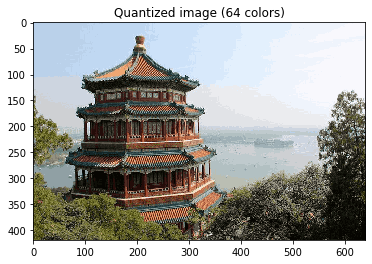

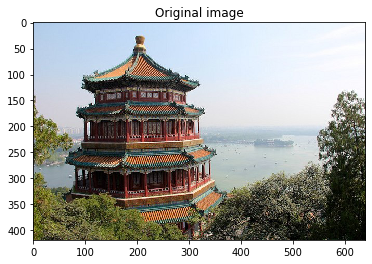

In [18]:
# 8. Show 64-color image
abc = plt.figure(1)
abc = plt.title('Quantized image (64 colors)')
abc = plt.imshow(modiImage) 

# 9. Show original image
abc = plt.figure(2)
abc = plt.title("Original image")
abc = abc = plt.imshow(china)

In [19]:
# 10.3 Save image and check size. It is reduced.
plt.imsave("modiImage.jpg", modiImage, format = "jpg")        # This does not reduce size

In [20]:
# Note: It appears that matplotlib's imsave, saves some extra
#       meta information about the image such as axes etc. and
#       hence the image size is more.

# 10.3.1 Use skimage.io utility
imsave("modiImage.jpg", modiImage)       # This does reduce image size

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [21]:
# 10.3.1 Use skimage.io utility
imsave("modiImage.jpg", modiImage)       # This does reduce image size

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
################# Done ###########################33